<a href="https://colab.research.google.com/github/balachidam21/exploratory_data_analysis/blob/main/automobile_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**

Exploratory data analysis allows you explore and get insights about the data and formulate hypotheses about the data that could lead to experiements and new data collection.
## Why is EDA Important?
The importance of EDA lies in detecting any errors, outliers and understand different patterns in the data.It results in understanding the data before making any assumptions.

## Parts of EDA
There are no definite steps that should in EDA. But the EDA should cover the following parts:


1.   Get maximum insights about the data
2.   Uncover underlying structure
3.   Get Important variables in the data
4.   Detect outliers and anomalies(if any)
5.   Test underlying assumptions




The Automobile dataset will be used for analysis. The data can be found [here.](https://www.kaggle.com/datasets/toramky/automobile-dataset)




## 1. Import required libraries and dataset

In [6]:
# 1 .Import libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
auto_data = pd.read_csv('Automobile_data.csv')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Check for missing values

In [8]:
auto_data.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

It shows that there are no missing values. But we can see that there special characters in the data.
We can see the property of each column to further analyse if there is any missing data.

In [9]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see that some columns which contains symbols are in the object data type. As well as some columns which should be an integer type are object type.

We can see the unique values in each columns and decide to replace the symbol values with Nan

In [10]:
for col in auto_data.columns:
  print('{}:{}'.format(col,auto_data[col].unique()))

symboling:[ 3  1  2  0 -1 -2]
normalized-losses:['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make:['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type:['gas' 'diesel']
aspiration:['std' 'turbo']
num-of-doors:['two' 'four' '?']
body-style:['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels:['rwd' 'fwd' '4wd']
engine-location:['front' 'rear']
wheel-base:[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

In [11]:

for col in auto_data.columns:
  auto_data[col].replace('?',np.nan,inplace=True)

auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
auto_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Visualize the missing data.
We can visualize to see the missing attributes. With this, we can make decisions about the missing data. 

We can either drop the missing data or replace the missing data with either mean or median value of the column.

Most of the time, we will not drop the column as it will not be helpful. we will replace the missing data with the mean.

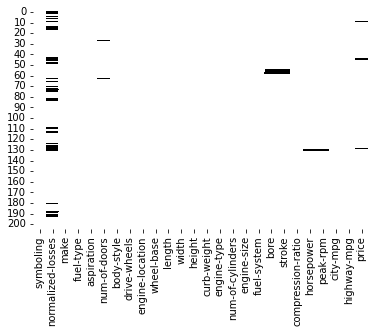

In [13]:
sns.heatmap(auto_data.isnull(),cbar=False,cmap='binary')

### Replacing Missing values
*normalized-losses* have many missing values while other columns only have few columns. we cannot drop normalized-losses as it may have useful information.

we will be using the mean of the entire columns(sometimes we can use median too.)

In [14]:
cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for col in cols:
  auto_data[col] = pd.to_numeric(auto_data[col])
  auto_data[col].fillna(auto_data[col].mean(),inplace=True)

auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## 3. Analysing the Data

This is the important step in EDA. The type of questions you ask about the data reveals the relationship between attributes and the target variable.

eg. How does fuel price affect price of the vehicle?

If you don't know what kind of questions to ask, we can start with correlation between the data. It gives a good place to analyse the dependency between variables and you can proceed from there.

In the automobile data, price is the target variable.

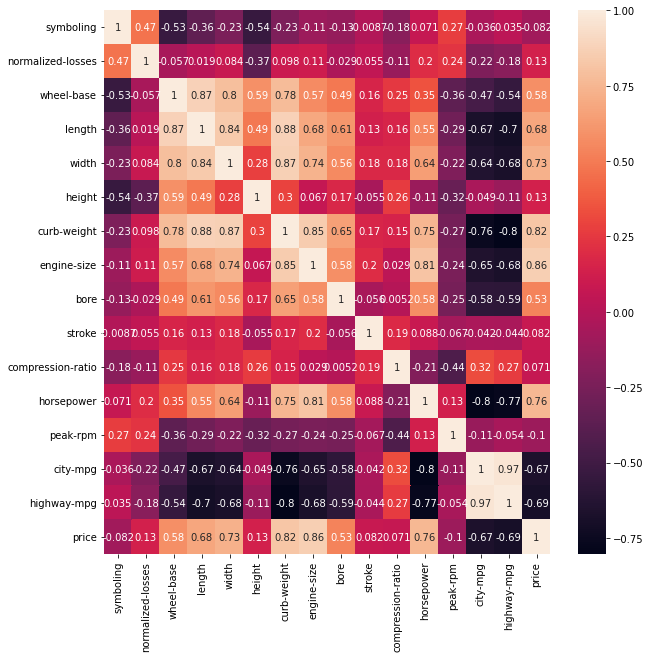

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(auto_data.corr(),annot=True)

From the heatmap above, we can see the correlation between all attributes.

### Positive Correlation


*   Price - wheel-base,length,width,curb-weight,engine-size,bore,horsepower
*   horsepower -length, width, curb-weight,engine-size,bore,price

### Negative Correlation

*   Price - city-mpg,highway-mpg
*   highway-mpg - wheel-base,length,width,height,engine-size,bore,horespower,price



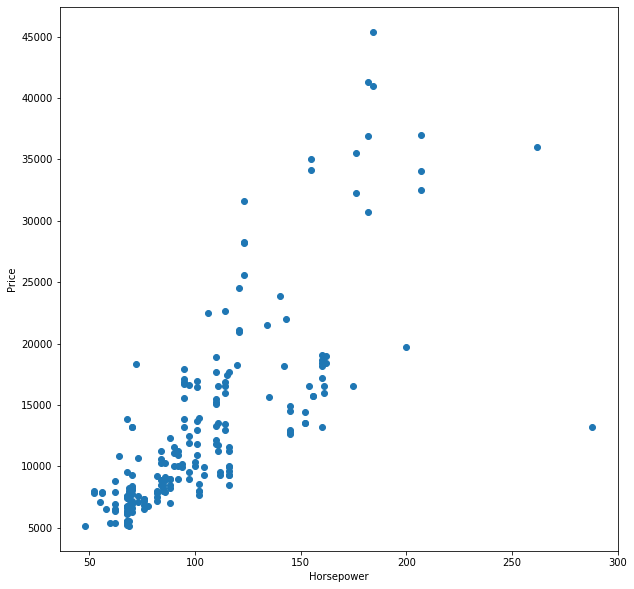

In [18]:
# what the relationship between horsepower and price?
plt.figure(figsize=(10,10))
plt.scatter(x='horsepower',y='price',data=auto_data)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

We can see that most of the horsepower value lies between 50 to 100 and price lies between 5000 to 20000 for the same range.

However, there are some outliers between horsepower value of 200 to 300.

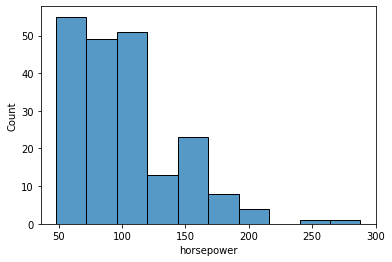

In [20]:
sns.histplot(auto_data.horsepower,bins=10)

The average count between 50 to 100 is 50 and it is positively skewed.

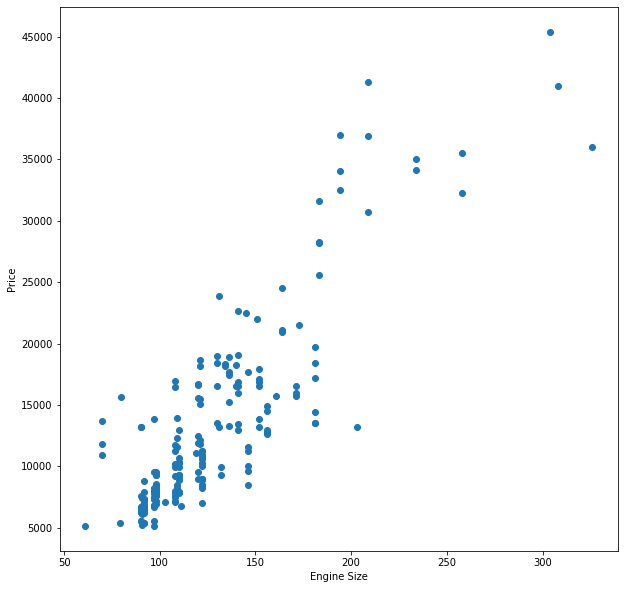

In [21]:
#relation between engine size and price ?
plt.figure(figsize=(10,10))
plt.scatter(x='engine-size',y='price',data=auto_data)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

The similarity is the same as horsepower.

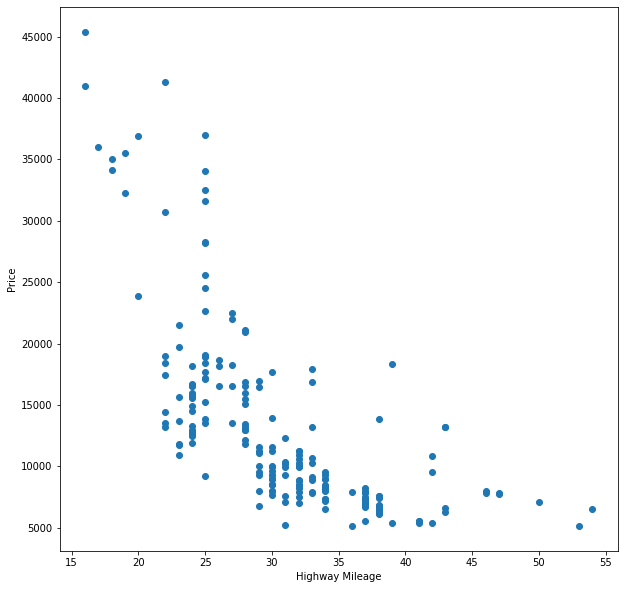

In [22]:
# What is the relation between highway-mpg and price?
plt.figure(figsize=(10,10))
plt.scatter(x='highway-mpg',y='price',data=auto_data)
plt.xlabel('Highway Mileage')
plt.ylabel('Price')
plt.show()

We can see that as highway mileage increases price decreases.